## Deteksi OutLier 
#**Penjelasan Outlier Deteksi dengan K-Nearest Neighbors (KNN) dalam Data Understanding**

#Apa Itu Outlier?
Outlier adalah data yang memiliki nilai yang jauh berbeda dari mayoritas data lainnya dalam suatu dataset. Outlier dapat muncul karena berbagai alasan, seperti kesalahan pengukuran, anomali dalam sistem, atau variasi alami dalam data.

Outlier perlu dideteksi karena dapat mempengaruhi analisis data, seperti:

Menyebabkan model prediktif menjadi kurang akurat.
Mengganggu distribusi data, terutama dalam analisis statistik.
Mengidentifikasi anomali yang mungkin relevan, seperti kecurangan atau kesalahan sistem.




In [ ]:
%pip install pymysql
%pip install psycopg2

 id           class  petal length  petal width  sepal length  sepal width  distance  outlier
  1     Iris-setosa           1.4          0.2           5.1          3.5  5.424942    False
  2     Iris-setosa          14.0          2.0          40.9         30.0 46.407542     True
  3     Iris-setosa           1.3          0.2           4.7          3.2  5.430470    False
  4     Iris-setosa           1.5          0.2           4.6          3.1  5.273519    False
  5     Iris-setosa           1.4          0.2           5.0          3.6  5.485435     True
  6     Iris-setosa           1.7          0.4           5.4          3.9  5.288667    False
  7     Iris-setosa           1.4          0.3           4.6          3.4  5.412947    False
  8     Iris-setosa           1.5          0.2           5.0          3.4  5.325411    False
  9     Iris-setosa           1.4          0.2           4.4          2.9  5.316014    False
 10     Iris-setosa           1.5          0.1           4.9          

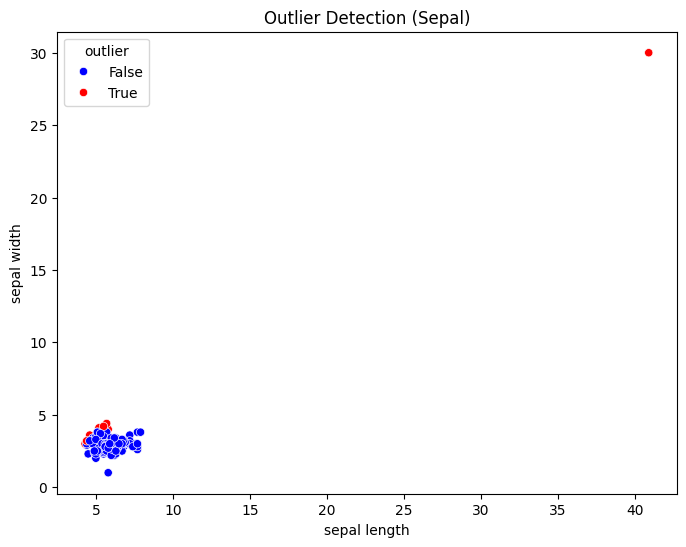

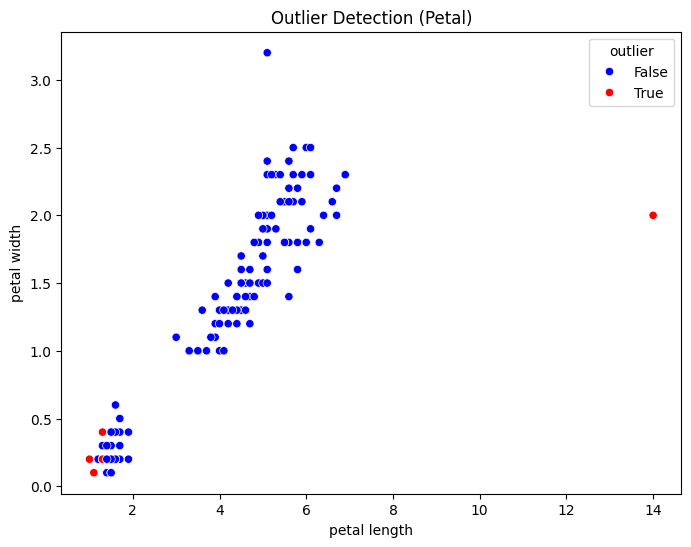

In [ ]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-138e7d50-postgresqllll.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_hUJVkoNFS0qvBDXnrxU",
        database="defaultdb",
        port=10802
    )
    cursor = conn.cursor()
    cursor.execute('SELECT * FROM  "Naufal"."postgree"')
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-2386dab1-myysqll.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_bZVPOBZt5yW-M1GcqrS",
        database="defaultdb",
        port=22065
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()
df_postgresql = df_postgresql.rename(columns={'Class': 'class'})

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal length", "petal width", "sepal length", "sepal width"]
data_values = df_merged[feature_columns].values

# Ambil referensi dari baris terakhir (baris ke-152 jika dihitung dari 1, atau index -1)
reference_point = data_values[-1]

def compute_distances(data, reference):
    return np.array([euclidean(row, reference) for row in data])

# Hitung jarak Euclidean dari setiap baris ke referensi
df_merged["distance"] = compute_distances(data_values, reference_point)

# Tentukan threshold outlier berdasarkan persentil ke-95 (bisa disesuaikan)
threshold = np.percentile(df_merged["distance"], 93.5)
df_merged["outlier"] = df_merged["distance"] > threshold

# Cetak hasil data dengan outlier
print(df_merged.to_string(index=False))

# Visualisasi scatter plot dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal length"], y=df_merged["sepal width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Sepal)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal length"], y=df_merged["petal width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal)")
plt.show()


In [ ]:
# Hitung total outlier
total_outliers = df_merged["outlier"].sum()
print(f"Total Outlier: {total_outliers}")


Total Outlier: 10


In [ ]:
# Urutkan data berdasarkan jarak dari terkecil ke terbesar
df_sorted = df_merged.sort_values(by="distance", ascending=True)

# Tampilkan hasilnya
print(df_sorted.to_string(index=False))

 id           class  petal length  petal width  sepal length  sepal width  distance  outlier
151             ???           5.1          3.2           5.8          1.0  0.000000    False
114  Iris-virginica           5.0          2.0           5.7          2.5  1.926136    False
115  Iris-virginica           5.1          2.4           5.8          2.8  1.969772    False
147  Iris-virginica           5.0          1.9           6.3          2.5  2.049390    False
120  Iris-virginica           5.0          1.5           6.0          2.2  2.092845    False
102  Iris-virginica           5.1          1.9           5.8          2.7  2.140093    False
143  Iris-virginica           5.1          1.9           5.8          2.7  2.140093    False
122  Iris-virginica           4.9          2.0           5.6          2.8  2.181742    False
 69 Iris-versicolor           4.5          1.5           6.2          2.2  2.202272    False
133  Iris-virginica           5.6          2.2           6.4          

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import LocalOutlierFactor

# Load dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Ubah nama kolom agar sesuai dengan permintaan
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# Tidak ada proses merge, jadi gunakan df langsung
df_merged = df.copy()

# Ambil fitur yang akan digunakan
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
X = df_merged[feature_columns]

# Inisialisasi model Local Outlier Factor
clf = LocalOutlierFactor(n_neighbors=20)

# Prediksi outlier (-1 = outlier, 1 = inlier)
y_pred = clf.fit_predict(X)

# Tambahkan hasil prediksi ke dalam DataFrame
df_merged["outlier"] = y_pred

# Tampilkan beberapa data pertama
print(df_merged.head())

# Hitung jumlah inlier dan outlier
outlier_count = (y_pred == -1).sum()
inlier_count = (y_pred == 1).sum()

print(f"\nJumlah Inlier: {inlier_count}")
print(f"Jumlah Outlier: {outlier_count}")


   sepal_length  sepal_width  petal_length  petal_width  outlier
0           5.1          3.5           1.4          0.2        1
1           4.9          3.0           1.4          0.2        1
2           4.7          3.2           1.3          0.2        1
3           4.6          3.1           1.5          0.2        1
4           5.0          3.6           1.4          0.2        1

Jumlah Inlier: 144
Jumlah Outlier: 6
